In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<AxesSubplot:xlabel='x', ylabel='y'>

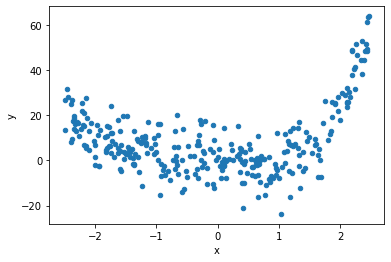

In [2]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [3]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [4]:
X_training, X_test, y_training, y_test = train_test_split(X,y,test_size=0.2)

In [5]:
print(len(X_training),len(y_training),len(X_test),len(y_test))

240 240 60 60


In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
_ = lr.fit(X_training,y_training)
pred_lr = lr.predict(X_test)

# mse
mse_lr_training = mean_squared_error(y_training, lr.predict(X_training))
mse_lr_test = mean_squared_error(y_test, pred_lr)
print(mse_lr_training, mse_lr_test)

204.36877504525725 191.56812723122852


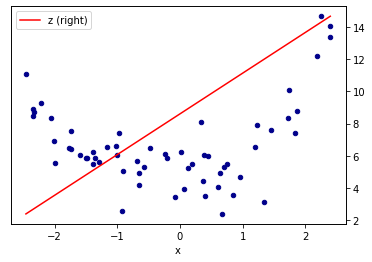

In [7]:
df = pd.DataFrame({'x': X_test.flatten(), 'y': y_test.flatten(), 'z': pred_lr.flatten()})
df = df.sort_values(by='x')
ax=df.plot(kind='scatter', x='x', y='y', color='DarkBlue')
df.plot(kind='line', x='x', y='z', secondary_y=True, color='Red', ax=ax);

In [8]:
import sklearn.neighbors
knn_reg_3 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
_ = knn_reg_3.fit(X_training, y_training)
kn_pr_3 = knn_reg_3.predict(X_test)

# mse
mse_kn_pr_3_training = mean_squared_error(y_training, knn_reg_3.predict(X_training))
mse_kn_pr_3_test = mean_squared_error(y_test, kn_pr_3)
print(mse_kn_pr_3_training, mse_kn_pr_3_test)

38.24417158224424 66.75746147624376


In [9]:
knn_reg_5 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
_ = knn_reg_5.fit(X_training, y_training)
kn_pr_5 = knn_reg_5.predict(X_test)

# mse
mse_kn_pr_5_training = mean_squared_error(y_training, knn_reg_5.predict(X_training))
mse_kn_pr_5_test = mean_squared_error(y_test, kn_pr_5)
print(mse_kn_pr_5_training, mse_kn_pr_5_test)

44.57544995964783 68.05471755289312


In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_features_2.fit_transform(X_training)
print(X_training[0], X_poly_2[0])
lin_reg_2 = LinearRegression()
_ = lin_reg_2.fit(X_poly_2, y_training)

X_poly_test_2 = poly_features_2.fit_transform(X_test)
poly_pr_2 = lin_reg_2.predict(X_poly_test_2)

# mse
mse_poly_pr_2_training = mean_squared_error(y_training, lin_reg_2.predict(X_poly_2))
mse_poly_pr_2_test = mean_squared_error(y_test, poly_pr_2)
print(mse_poly_pr_2_training, mse_poly_pr_2_test)

[-1.96716936] [-1.96716936  3.86975527]
91.4742103739477 59.205249482104506


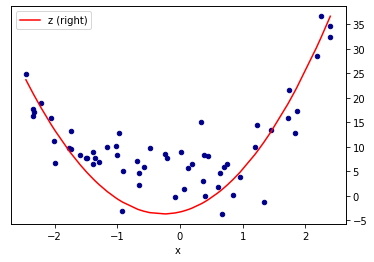

In [12]:
df = pd.DataFrame({'x': X_test.flatten(), 'y': y_test.flatten(), 'z': poly_pr_2.flatten()})
df = df.sort_values(by='x')
ax=df.plot(kind='scatter', x='x', y='y', color='DarkBlue')
df.plot(kind='line', x='x', y='z', secondary_y=True, color='Red', ax=ax);

In [13]:
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_3 = poly_features_3.fit_transform(X_training)
print(X_training[0], X_poly_3[0])
lin_reg_3 = LinearRegression()
_ = lin_reg_3.fit(X_poly_3, y_training)

X_poly_test_3 = poly_features_3.fit_transform(X_test)
poly_pr_3 = lin_reg_3.predict(X_poly_test_3)

# mse
mse_poly_pr_3_training = mean_squared_error(y_training, lin_reg_3.predict(X_poly_3))
mse_poly_pr_3_test = mean_squared_error(y_test, poly_pr_3)
print(mse_poly_pr_3_training, mse_poly_pr_3_test)

[-1.96716936] [-1.96716936  3.86975527 -7.61246398]
69.1738912635555 58.04659387771013


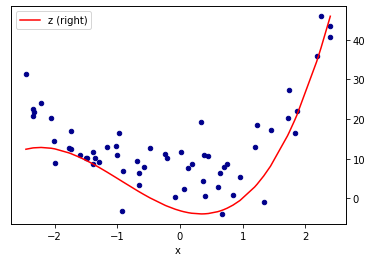

In [14]:
df = pd.DataFrame({'x': X_test.flatten(), 'y': y_test.flatten(), 'z': poly_pr_3.flatten()})
df = df.sort_values(by='x')
ax=df.plot(kind='scatter', x='x', y='y', color='DarkBlue')
df.plot(kind='line', x='x', y='z', secondary_y=True, color='Red', ax=ax);

In [15]:
poly_features_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly_4 = poly_features_4.fit_transform(X_training)
print(X_training[0], X_poly_4[0])
lin_reg_4 = LinearRegression()
_ = lin_reg_4.fit(X_poly_4, y_training)

X_poly_test_4 = poly_features_4.fit_transform(X_test)
poly_pr_4 = lin_reg_4.predict(X_poly_test_4)

# mse
mse_poly_pr_4_training = mean_squared_error(y_training, lin_reg_4.predict(X_poly_4))
mse_poly_pr_4_test = mean_squared_error(y_test, poly_pr_4)
print(mse_poly_pr_4_training, mse_poly_pr_4_test)

[-1.96716936] [-1.96716936  3.86975527 -7.61246398 14.97500587]
57.39121299299653 48.59990959426514


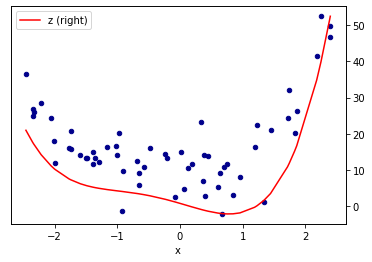

In [16]:
df = pd.DataFrame({'x': X_test.flatten(), 'y': y_test.flatten(), 'z': poly_pr_4.flatten()})
df = df.sort_values(by='x')
ax=df.plot(kind='scatter', x='x', y='y', color='DarkBlue')
df.plot(kind='line', x='x', y='z', secondary_y=True, color='Red', ax=ax);

In [17]:
poly_features_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly_5 = poly_features_5.fit_transform(X_training)
print(X_training[0], X_poly_5[0])
lin_reg_5 = LinearRegression()
_ = lin_reg_5.fit(X_poly_5, y_training)

X_poly_test_5 = poly_features_5.fit_transform(X_test)
poly_pr_5 = lin_reg_5.predict(X_poly_test_5)

# mse
mse_poly_pr_5_training = mean_squared_error(y_training, lin_reg_5.predict(X_poly_5))
mse_poly_pr_5_test = mean_squared_error(y_test, poly_pr_5)
print(mse_poly_pr_5_training, mse_poly_pr_5_test)

[-1.96716936] [ -1.96716936   3.86975527  -7.61246398  14.97500587 -29.45837263]
57.32165586469717 49.19818167136313


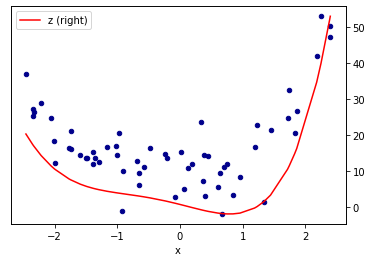

In [18]:
df = pd.DataFrame({'x': X_test.flatten(), 'y': y_test.flatten(), 'z': poly_pr_5.flatten()})
df = df.sort_values(by='x')
ax=df.plot(kind='scatter', x='x', y='y', color='DarkBlue')
df.plot(kind='line', x='x', y='z', secondary_y=True, color='Red', ax=ax);

In [21]:
import pickle
data = np.array([[mse_lr_training, mse_lr_test],
       [mse_kn_pr_3_training, mse_kn_pr_3_test],
       [mse_kn_pr_5_training, mse_kn_pr_5_test],
       [mse_poly_pr_2_training, mse_poly_pr_2_test],
       [mse_poly_pr_3_training, mse_poly_pr_3_test],
       [mse_poly_pr_4_training, mse_poly_pr_4_test],
       [mse_poly_pr_5_training, mse_poly_pr_5_test],])
summary = pd.DataFrame(data,columns=['train_mse','test_mse'])
    
summary.to_pickle('mse.pkl')

summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   train_mse  7 non-null      float64
 1   test_mse   7 non-null      float64
dtypes: float64(2)
memory usage: 240.0 bytes


In [22]:

reggressors = [(lr,None),(knn_reg_3,None),(knn_reg_5,None), (lin_reg_2,
poly_features_2), (lin_reg_3, poly_features_3), (lin_reg_4, poly_features_4),
(lin_reg_5, poly_features_5)]

with open('reg.pkl', 'wb') as handle:
    pickle.dump(reggressors, handle)